<a href="https://colab.research.google.com/github/kopeomojola/Tokyo2020/blob/main/Olympic_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with an RNN

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/drive/1EaAYMOMrPz9bR6URojmgO1Ta9rwavCo1#scrollTo=SFLgO4Hn-Gm7">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/kopeomojola/Tokyo2020/blob/main/Olympic_Sentiment_Analysis.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Sentiment Analysis with an Recurrent Neural Network

We will use a RNN for sentiment analysis because we care for the sequence in the data.

### Imports

In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

### Loading in Dataset

In [2]:
url = 'https://raw.githubusercontent.com/kopeomojola/Tokyo2020/main/datas.csv'
data = pd.read_csv(url)
data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(9868, 10)


,Unnamed: 0,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,7669,Sydney Olympics were bought ‘to a large extent...,sydney olympics were bought to a large extent...,0.107143,0.214286,neutral,0.000,1.000,0.000,0.0000
1,6699,@tomwitosky @LauraRBelin @CNN @IAGovernor Kati...,katie ledecky is an olympic gold medal...,0.050000,0.250000,positive,0.046,0.741,0.212,0.8519
2,6511,i can’t stop thinking about that video of kana...,i can t stop thinking about that video of kana...,0.000000,0.000000,negative,0.180,0.820,0.000,-0.2960
3,6613,@RBConservative I'm guessing the feedback on t...,i m guessing the feedback on the doorstep re...,0.445714,0.462857,positive,0.000,0.684,0.316,0.9337
4,1094,Paul looking like an Olympic diver there. Baaa...,paul looking like an olympic diver there baaa...,0.000000,0.000000,positive,0.000,0.783,0.217,0.3612


Removing all columns except the sentiment and text column.

In [3]:
data = data[['sentiment', 'text']]
data.head()

,sentiment,text
0,neutral,sydney olympics were bought to a large extent...
1,positive,katie ledecky is an olympic gold medal...
2,negative,i can t stop thinking about that video of kana...
3,positive,i m guessing the feedback on the doorstep re...
4,positive,paul looking like an olympic diver there baaa...


### Data exploration

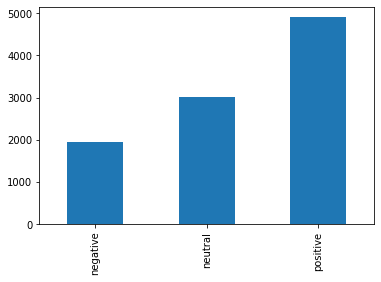

In [4]:
data['sentiment'].value_counts().sort_index().plot.bar()

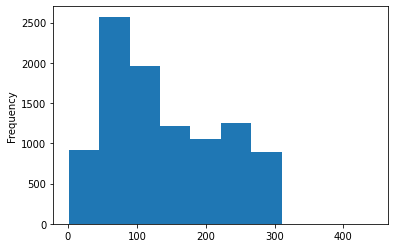

In [5]:
data['text'].str.len().plot.hist()

### Preprocessing

In [6]:
data['text'] = data['text'].str.replace('@VirginAmerica', '')
data.head()

,sentiment,text
0,neutral,sydney olympics were bought to a large extent...
1,positive,katie ledecky is an olympic gold medal...
2,negative,i can t stop thinking about that video of kana...
3,positive,i m guessing the feedback on the doorstep re...
4,positive,paul looking like an olympic diver there baaa...


In [7]:
data['text'].apply(lambda x: x.lower()) #transform text to lowercase
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['text'].head()

0    sydney olympics were bought  to a large extent...
1            katie ledecky is an olympic gold medal...
2    i can t stop thinking about that video of kana...
3      i m guessing the feedback on the doorstep re...
4    paul looking like an olympic diver there  baaa...
Name: text, dtype: object

In [8]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  179,
           4,   62,  279,    3,    7,  306,  373,  123,  239,  283,  211,
         295],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  333, 1495,   12,   19,    2,   27,
          60,  311, 2692,  655,   18, 2693,   96,   32,    7,  865, 3825,
          25,   85,    7,  193,  120,   15,   25, 3826,   28,  109,  387,
        1017,   25,  55

### Creating model

In [9]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 256)           1280000   
                                                                 
 dropout (Dropout)           (None, 78, 256)           0         
                                                                 
 lstm (LSTM)                 (None, 78, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [11]:
y = pd.get_dummies(data['sentiment']).values
[print(data['sentiment'][i], y[i]) for i in range(0,5)]

neutral [0 1 0]
positive [0 0 1]
negative [1 0 0]
positive [0 0 1]
positive [0 0 1]


[None, None, None, None, None]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training model

In [13]:
batch_size = 32
epochs = 8

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
247/247 - 368s - loss: 0.7786 - accuracy: 0.6682 - 368s/epoch - 1s/step
Epoch 2/8
247/247 - 342s - loss: 0.4208 - accuracy: 0.8410 - 342s/epoch - 1s/step
Epoch 3/8
247/247 - 341s - loss: 0.2576 - accuracy: 0.9150 - 341s/epoch - 1s/step
Epoch 4/8
247/247 - 358s - loss: 0.1875 - accuracy: 0.9382 - 358s/epoch - 1s/step
Epoch 5/8
247/247 - 341s - loss: 0.1480 - accuracy: 0.9543 - 341s/epoch - 1s/step
Epoch 6/8
247/247 - 341s - loss: 0.1193 - accuracy: 0.9657 - 341s/epoch - 1s/step
Epoch 7/8
247/247 - 343s - loss: 0.1076 - accuracy: 0.9663 - 343s/epoch - 1s/step
Epoch 8/8
247/247 - 339s - loss: 0.0829 - accuracy: 0.9757 - 339s/epoch - 1s/step


In [14]:
model.save('sentiment_analysis.h5')

### Testing model

In [15]:
predictions = model.predict(X_test)

[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

sydney olympics were bought  to a large extent   said australian official john coates    [0.00172656 0.0068399  0.9914335 ] [1 0 0]
        katie ledecky is an olympic gold medal winner   william thomas was ranked over 400th as a male competitor  he won a national race that he stole from some young lady  he lost after he was ostracized by the crowd and fellow competitors   2genders [0.5727897  0.41177988 0.0154304 ] [0 1 0]
i can t stop thinking about that video of kanade at the olympics [0.48843518 0.01263606 0.4989287 ] [0 0 1]
  i m guessing the feedback on the doorstep regarding paedophile apologising and playing the oppression olympics card in support wasn t good then  good  or was it just his eagerness to trample over women s rights to single sex spaces and their very definition  either way  all good  [5.7173590e-04 9.6991259e-01 2.9515645e-02] [0 1 0]
paul looking like an olympic diver there  baaaaad call  tblvstor [9.9977165e-01 1.2076200e-04 1.0762225e-04] [1 0 0]


[None, None, None, None, None]

In [16]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 1038
Neutral predictions: 570
Negative predictions: 366
Real positive: 995
Real neutral: 585
Real negative: 394


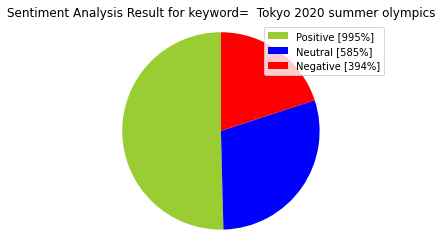

In [17]:
keyword = "Tokyo 2020 summer olympics"
labels = ['Positive ['+str(real_pos)+'%]' , 'Neutral ['+str(real_neu)+'%]','Negative ['+str(real_neg)+'%]']
sizes = [real_pos, real_neu, real_neg]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()